In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load data
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("\nColumn data types:")
print(df.dtypes)


Column data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print("\nBasic statistics:")
display(df.describe())


Basic statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# CHURN DISTRIBUTION

In [7]:
print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")


Churn Rate: 26.54%


/var/folders/l4/_713n449209fzggqy4q1m0hh0000gn/T/ipykernel_76679/3004394606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


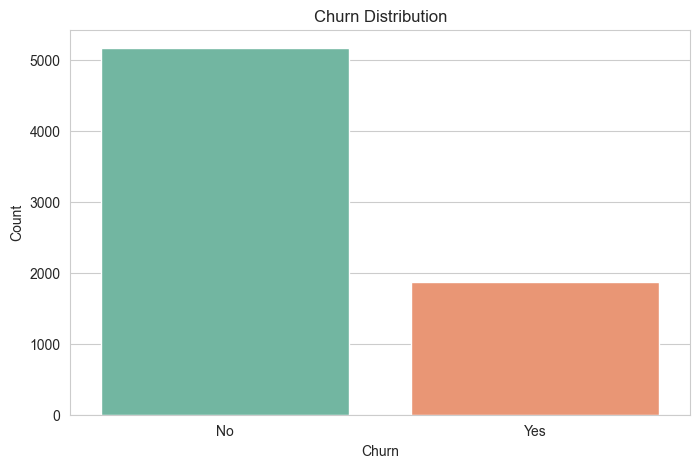

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()

# CHURN BY DEMOGRAPHICS

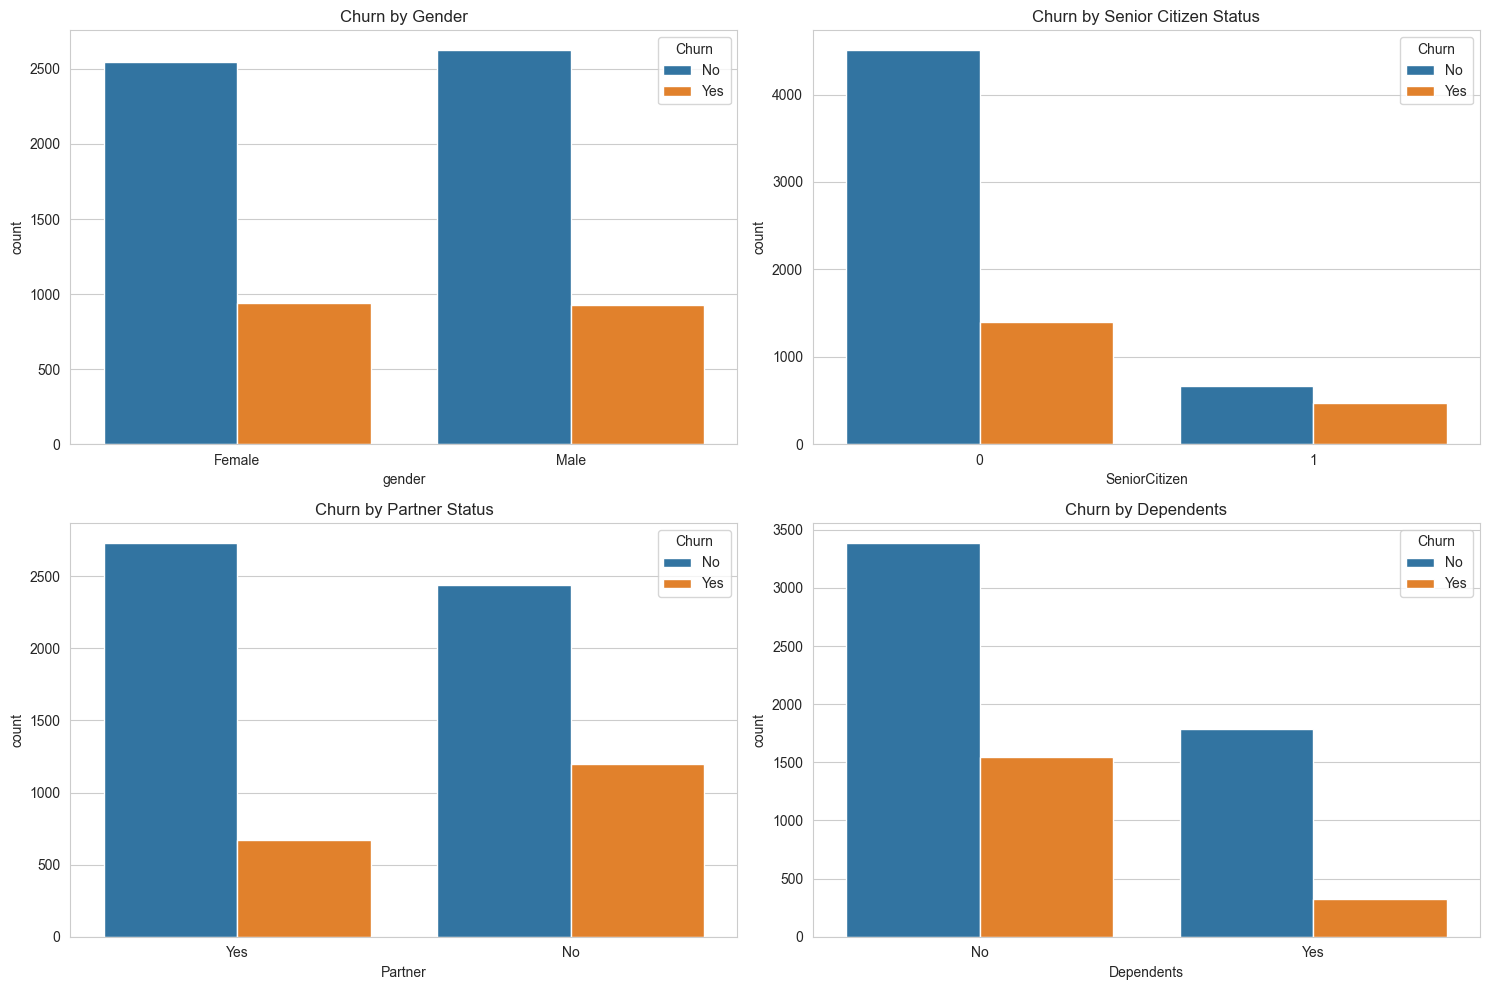

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=df, x='gender', hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title('Churn by Gender')

sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Senior Citizen Status')

sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Churn by Partner Status')

sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title('Churn by Dependents')

plt.tight_layout()
plt.show()

# CHURN BY CONTRACT TYPE (Important insight!)

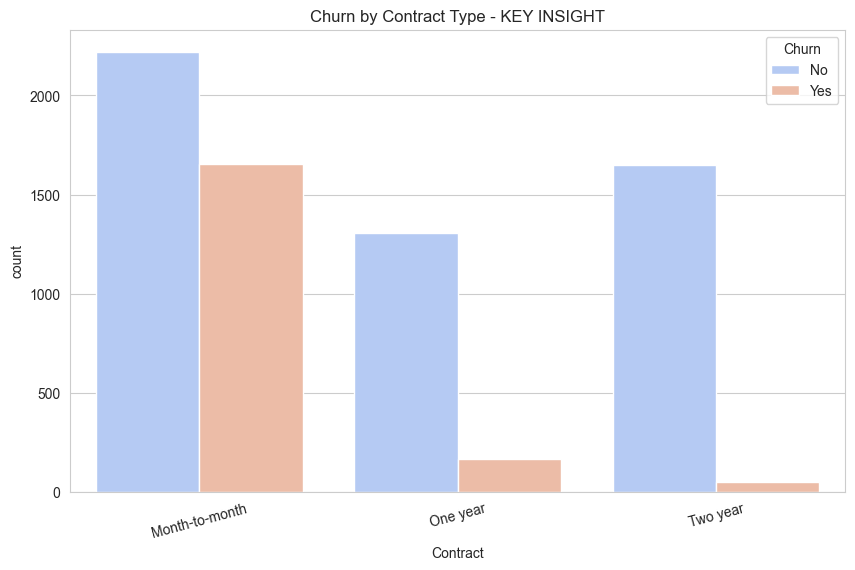

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type - KEY INSIGHT')
plt.xticks(rotation=15)
plt.show()

# MONTHLY CHARGES vs CHURN

/var/folders/l4/_713n449209fzggqy4q1m0hh0000gn/T/ipykernel_76679/3645581771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1')


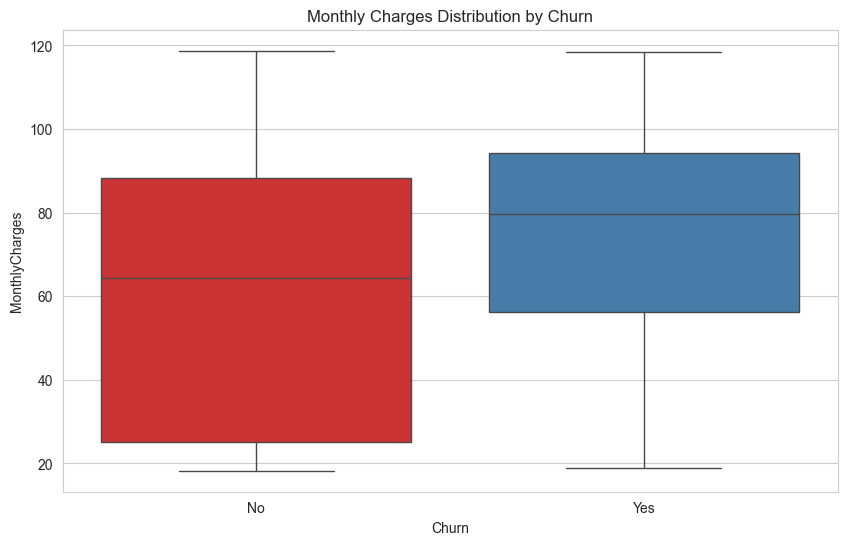

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

# TENURE vs CHURN

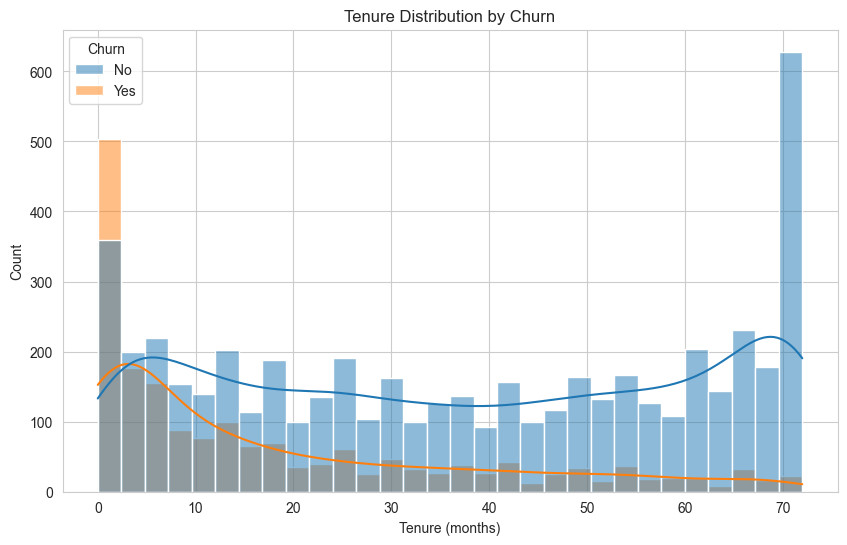

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.show()

# CORRELATION HEATMAP (for numerical features)

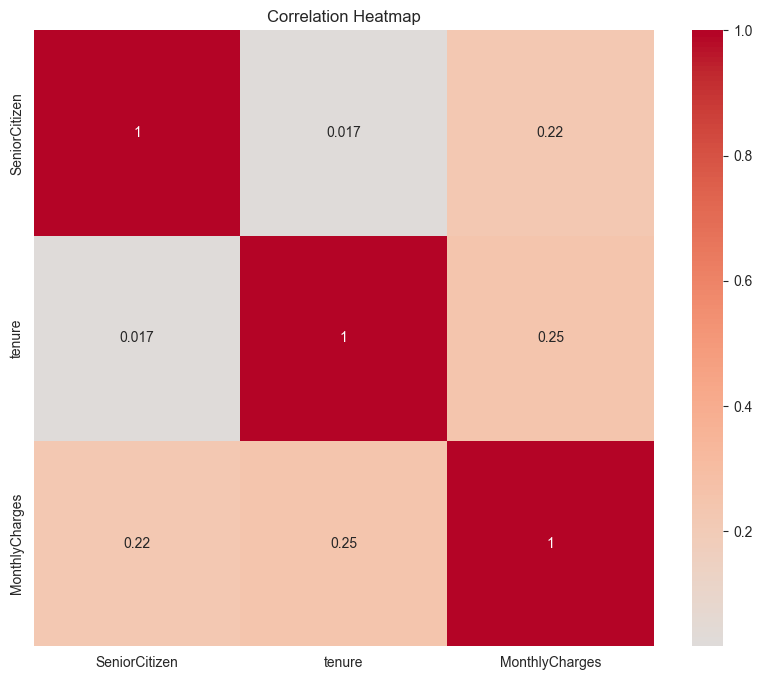

In [13]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()